# Water Potability Prediction - Machine Learning Model

### - Water potability refers to the safety water for human consumption
### - Potable water is free from harmful contaminants and bacteria and is safe for drinking and food preparation
### - There are various method to ensure water potability, including filtration, and treatment processes such as UV filtration and reverse osmosis

# 

## 1. Library Improting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 

## 2. Exploratory Data Analysis (EDA) 

In [2]:
water_data = pd.read_csv('water_potability.csv')
water_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
water_data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

#### - ph : pH of water 
#### - Hardness : Capacity of water to precipitate soap in mg/L
#### - Solids : Total dissolved solids in ppm
#### - Chloramines : Amounts of Chloramines in ppm
#### - Sulfate : Amounts of Sulfates dissolved in mg/L
#### - Conductivity : Electrical conductivity of water in uS/cm
#### - Organic_carbon : Amount of organic carbon in ppm
#### - Trihalomethanes : Amount of Trihalomethanes in mg/L
#### - Turbidity : Measure of light emiting property of water in NTV ( Nephelometric Turbidity Units )
#### - Potability : Indicates if water is safe for human consumption

# 

In [4]:
water_data.shape

(3276, 10)

In [5]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
water_data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [7]:
water_data.duplicated().any()

False

In [8]:
water_data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [9]:
null_df = water_data.isnull().sum().reset_index()
null_df.columns = ['Columns', 'Null_count']
null_df['%miss_value'] = round(null_df['Null_count']/len(water_data), 2)*100
null_df

,Columns,Null_count,%miss_value
0,ph,491,15.0
1,Hardness,0,0.0
2,Solids,0,0.0
3,Chloramines,0,0.0
4,Sulfate,781,24.0
5,Conductivity,0,0.0
6,Organic_carbon,0,0.0
7,Trihalomethanes,162,5.0
8,Turbidity,0,0.0
9,Potability,0,0.0


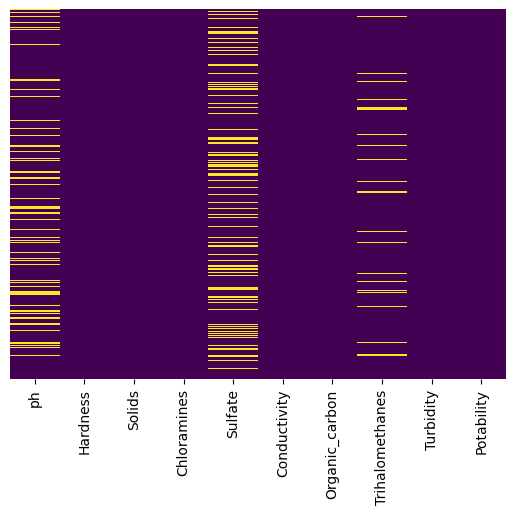

In [10]:
sns.heatmap(water_data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

# 

## 3. Handling Missing Values 

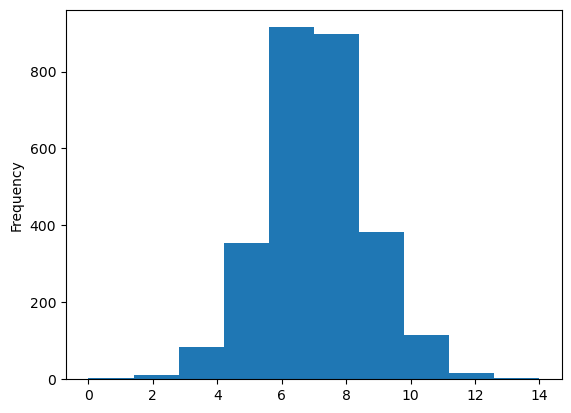

In [11]:
water_data['ph'].plot(kind = 'hist')
plt.show()

<AxesSubplot:ylabel='Frequency'>

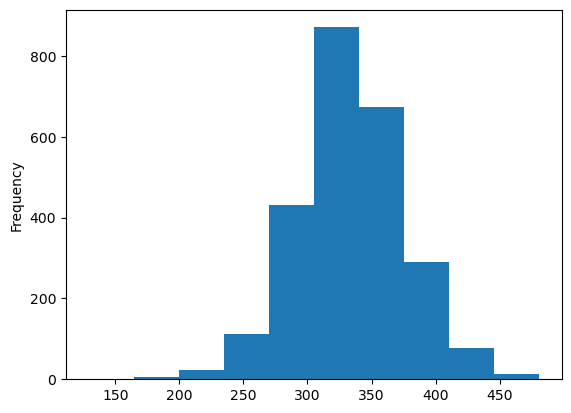

In [12]:
water_data['Sulfate'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

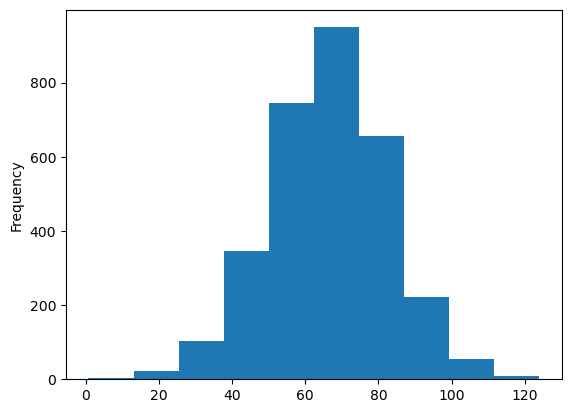

In [13]:
water_data['Trihalomethanes'].plot(kind = 'hist')

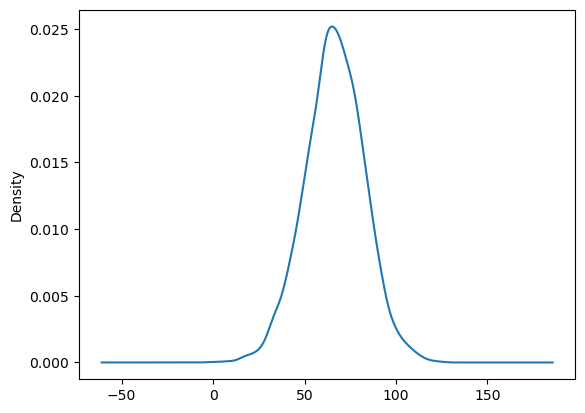

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
water_data['Trihalomethanes'].plot(kind='kde', ax=ax)
plt.show()

In [15]:
water_data['ph'] = water_data['ph'].fillna(water_data['ph'].mean())
water_data['Sulfate'] = water_data['Sulfate'].fillna(water_data['Sulfate'].mean())
water_data['Trihalomethanes'] = water_data['Trihalomethanes'].fillna(water_data['Trihalomethanes'].mean())

In [16]:
water_data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# 

## 4. Check for Correlation 

In [17]:
corr_matrix = water_data.corr()
corr_matrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


<AxesSubplot:>

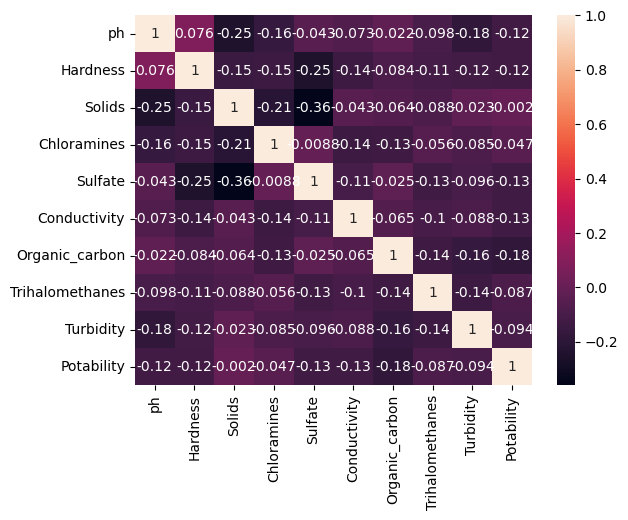

In [18]:
import seaborn as sns
sns.heatmap(corr_matrix.corr(), annot=True, cbar=True)

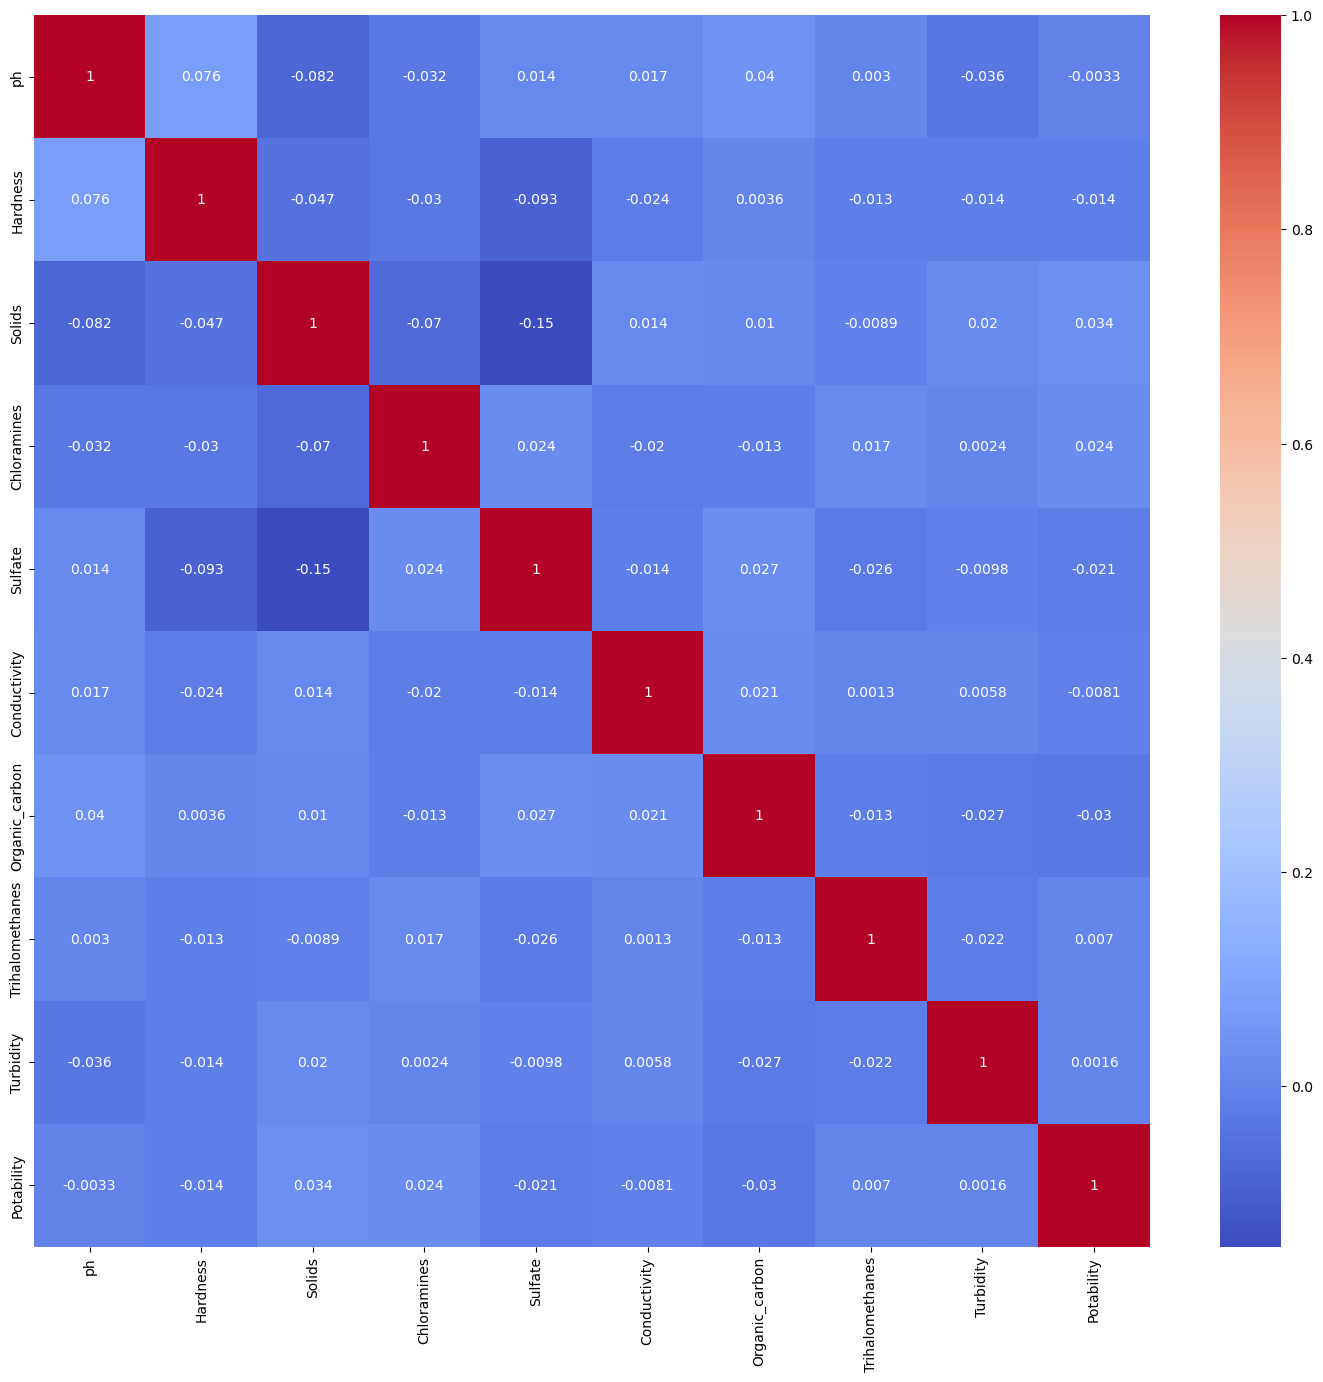

In [19]:
plt.figure(figsize = (18, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

dapat dilihat bahwa tidak ada korelasi yang signifikan dari variabel-variabel tersebut.

In [20]:
corr_matrix1 = corr_matrix.abs()
upper_tri = corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape), k=1).astype(np.bool_))
upper_tri

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,NaN,0.075833,0.081884,0.031811,0.014403,0.017192,0.040061,0.002994,0.036222,0.003287
Hardness,NaN,NaN,0.046899,0.030054,0.092766,0.023915,0.003610,0.012690,0.014449,0.013837
Solids,NaN,NaN,NaN,0.070148,0.149840,0.013831,0.010242,0.008875,0.019546,0.033743
Chloramines,NaN,NaN,NaN,NaN,0.023791,0.020486,0.012653,0.016627,0.002363,0.023779
Sulfate,NaN,NaN,NaN,NaN,NaN,0.014059,0.026909,0.025605,0.009790,0.020619
Conductivity,NaN,NaN,NaN,NaN,NaN,NaN,0.020966,0.001255,0.005798,0.008128
Organic_carbon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012976,0.027308,0.030001
Trihalomethanes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021502,0.006960
Turbidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001581
Potability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

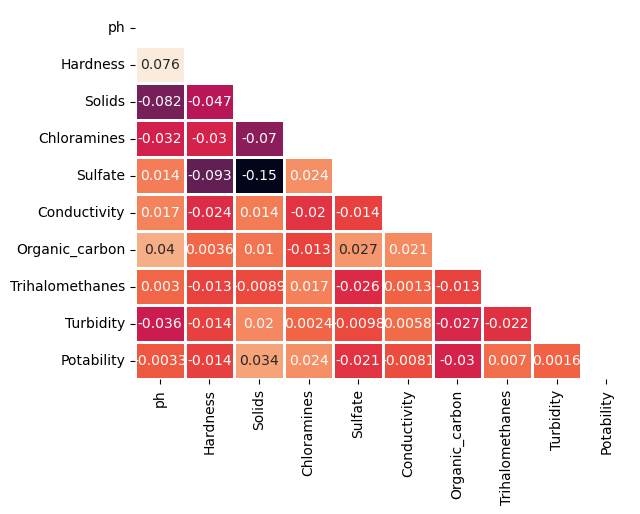

In [21]:
matrix = np.triu(corr_matrix)
sns.heatmap(water_data.corr(), annot=True, linewidth=.8, mask=matrix, cmap='rocket', cbar=False)

ini adalah salah satu bentuk matrix korelasi yang lainnya, dapat menggunakan yang sebelumnya atau yang ini, sama saja.

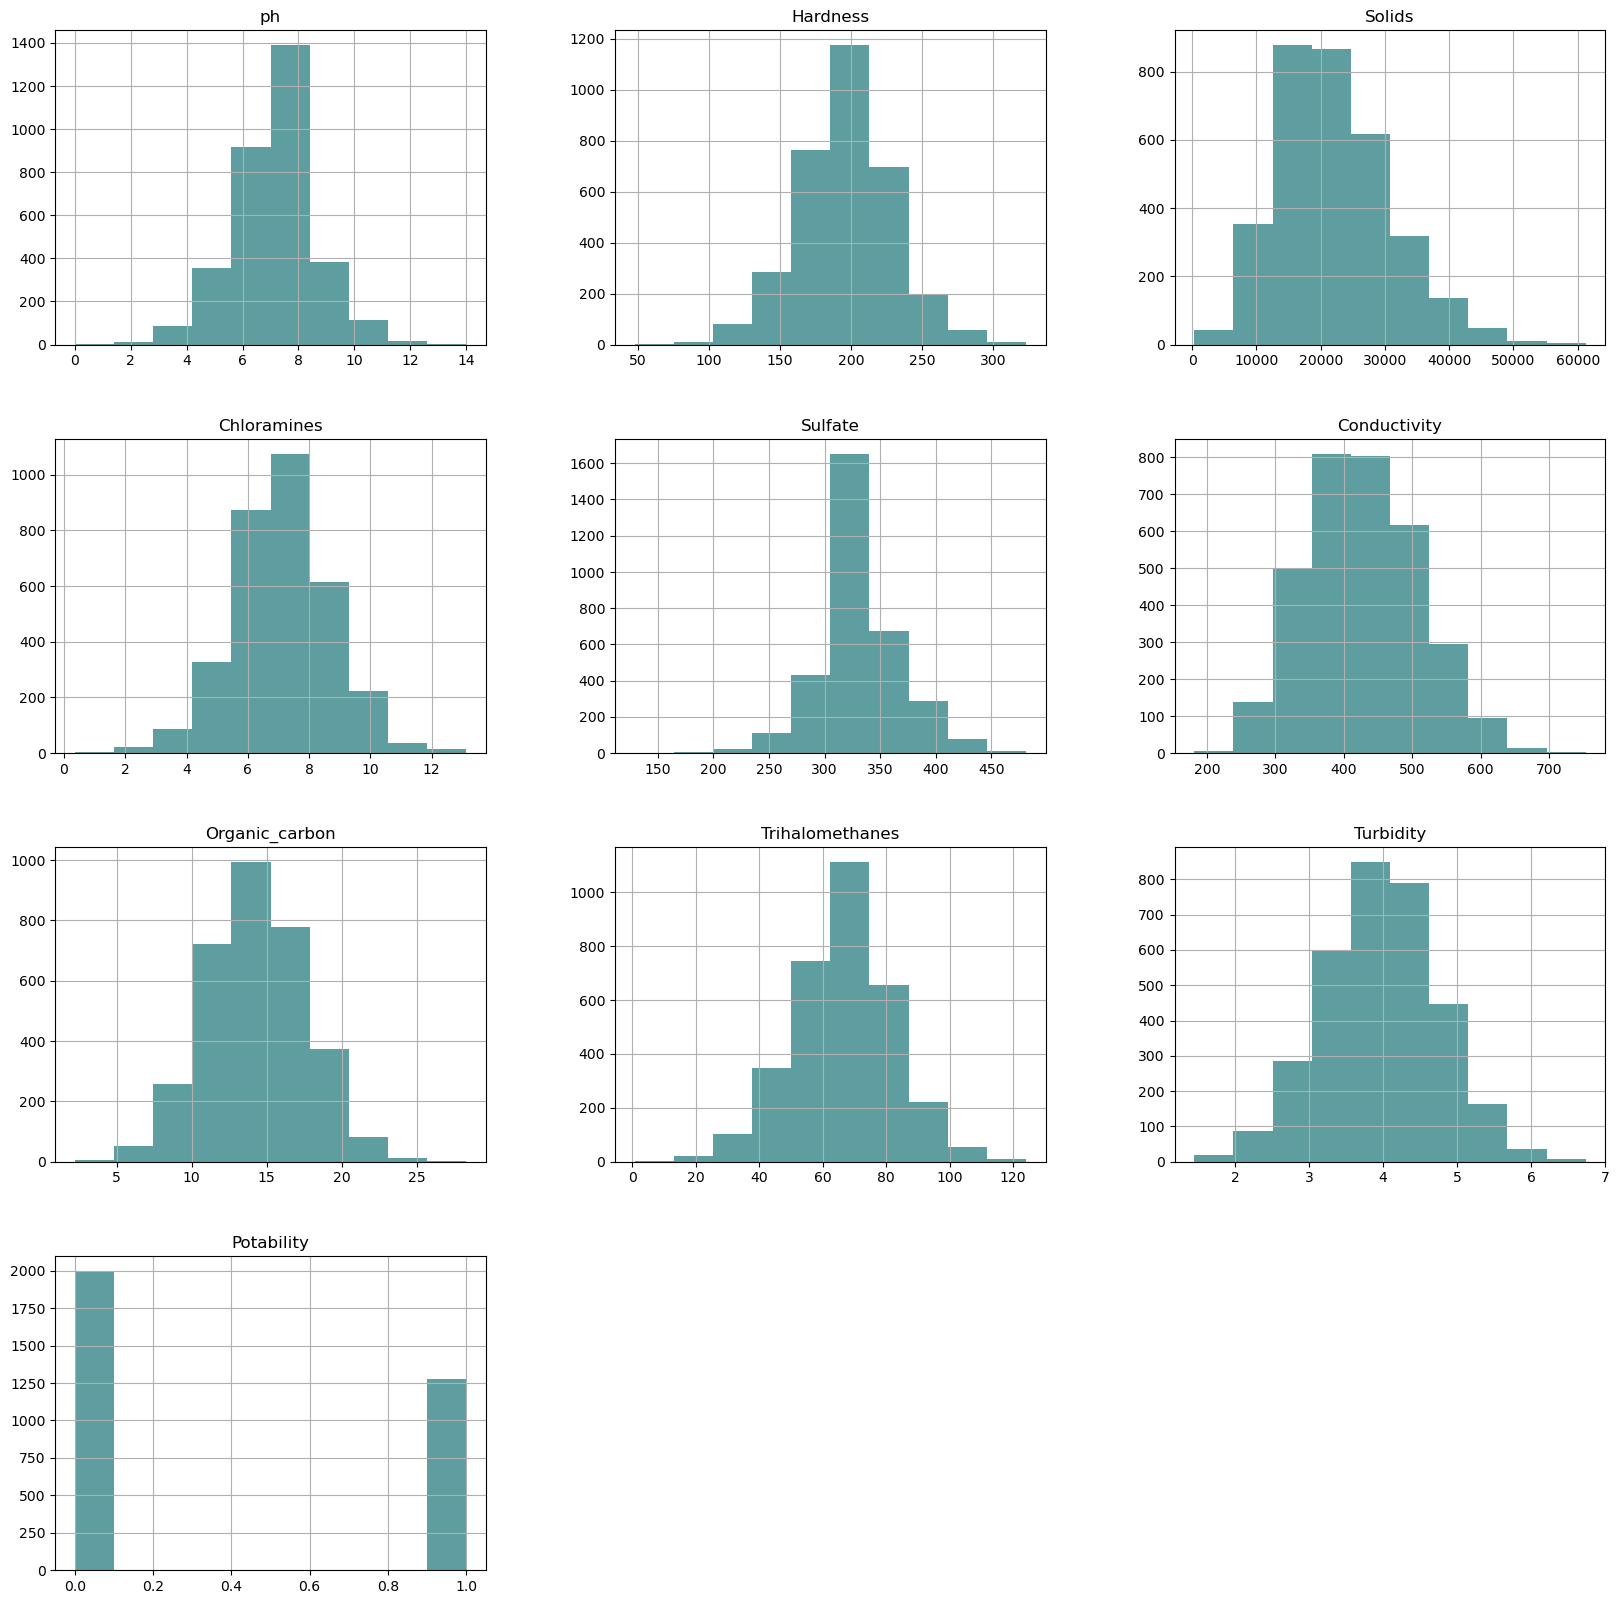

In [22]:
data_hist_plot = water_data.hist(figsize=(20, 20), color = '#5F9EA0')

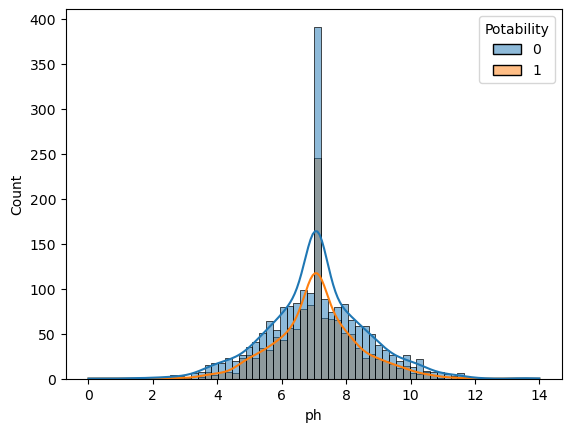

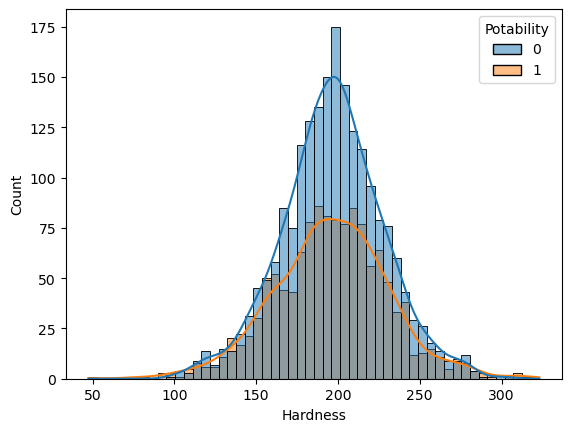

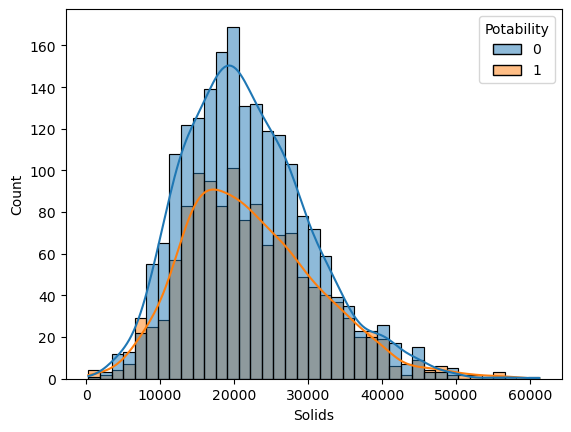

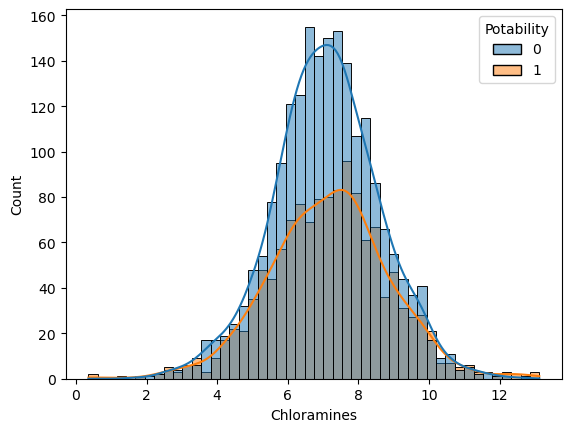

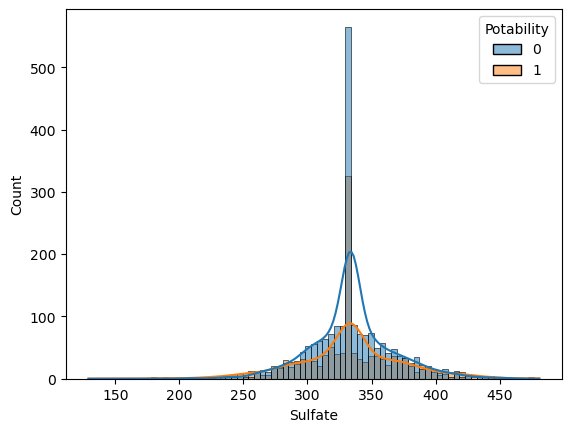

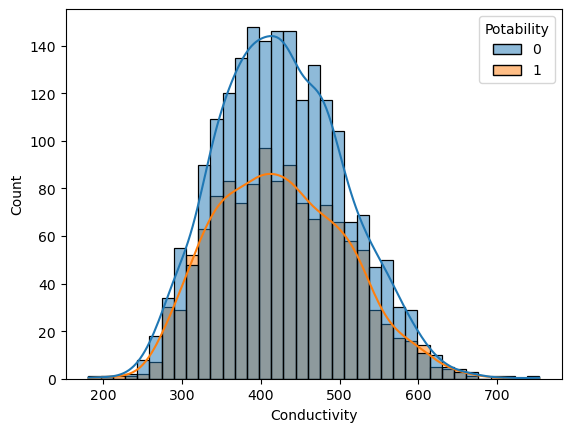

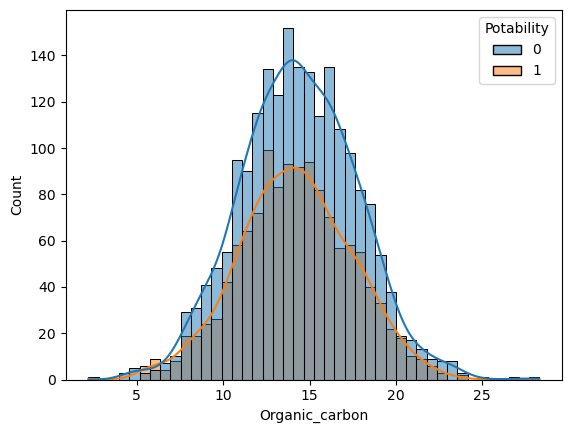

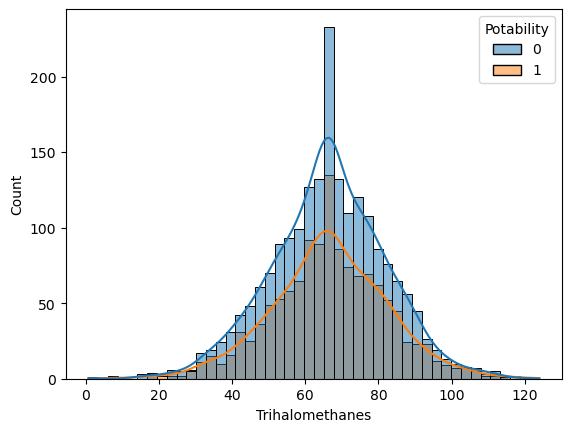

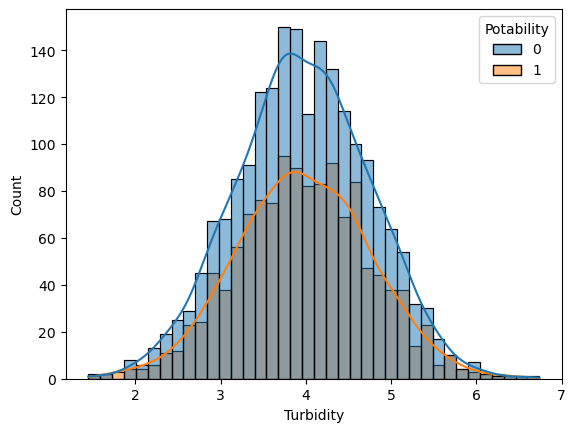

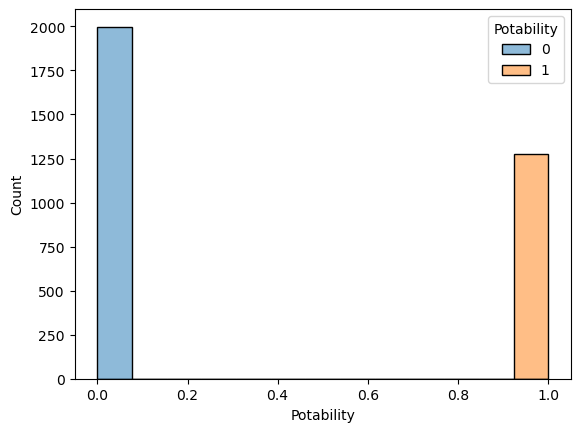

In [23]:
for col in water_data.columns :
    sns.histplot(data=water_data, x=col, kde=True, hue='Potability')
    plt.show()

In [24]:
water_data.groupby('Potability').mean().T

Potability,0,1
ph,7.084658,7.074754
Hardness,196.733292,195.800744
Solids,21777.490788,22383.991018
Chloramines,7.092175,7.169338
Sulfate,334.371700,332.844122
Conductivity,426.730454,425.383800
Organic_carbon,14.364335,14.160893
Trihalomethanes,66.308522,66.533513
Turbidity,3.965800,3.968328


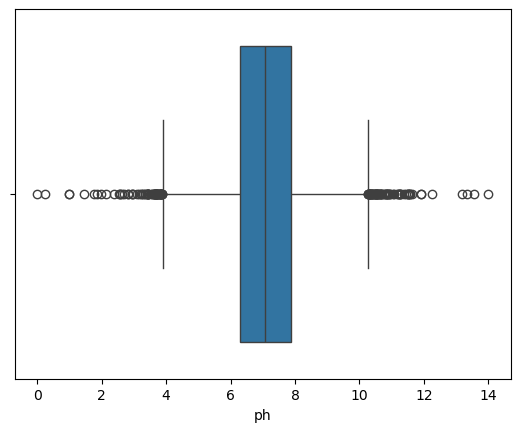

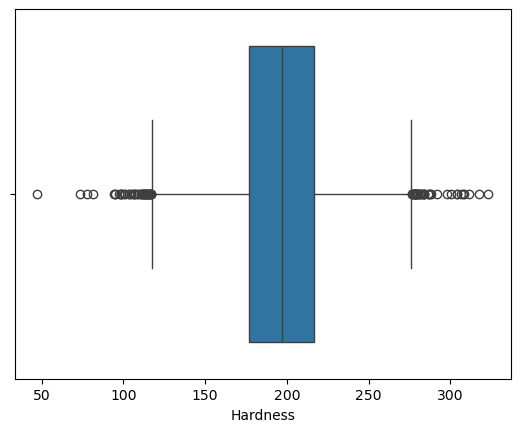

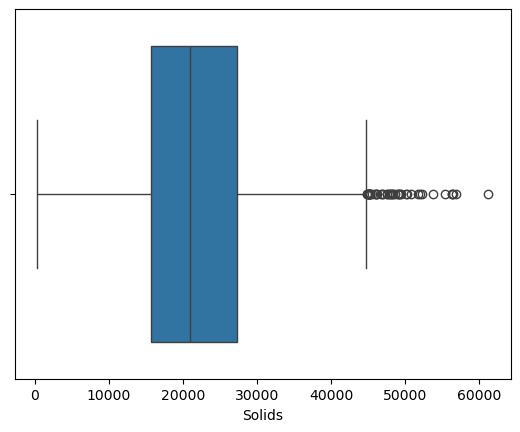

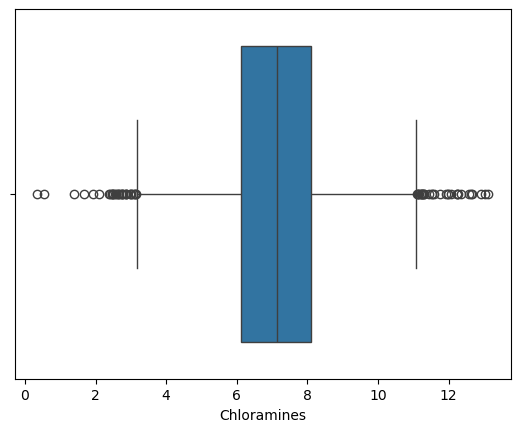

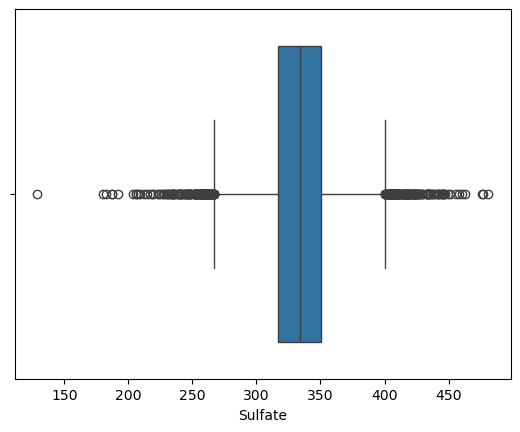

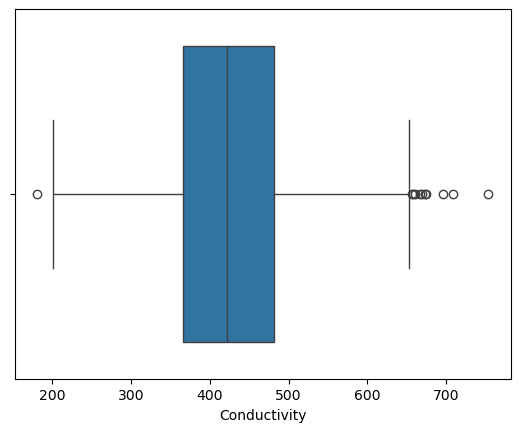

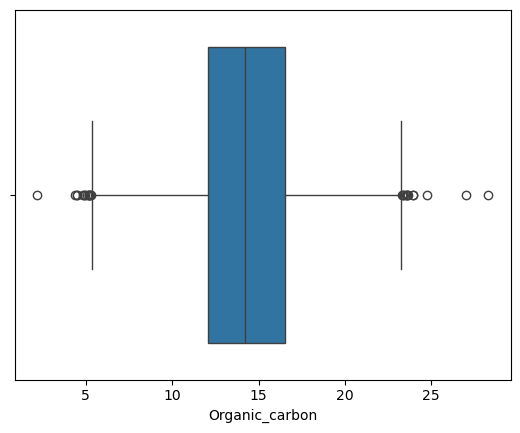

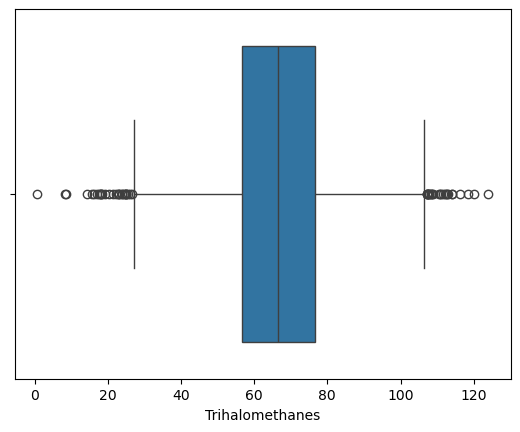

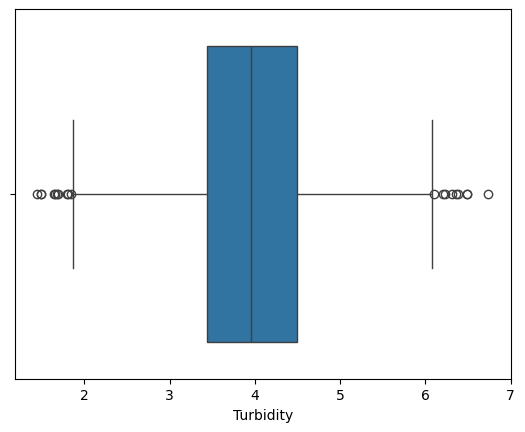

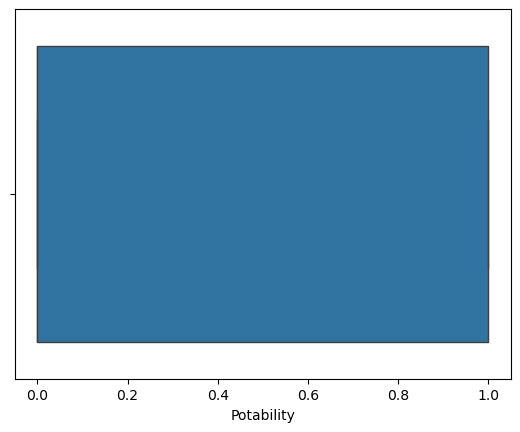

In [25]:
for col in water_data.columns :
    sns.boxplot(data=water_data, x=col)
    plt.show()

<AxesSubplot:ylabel='count'>

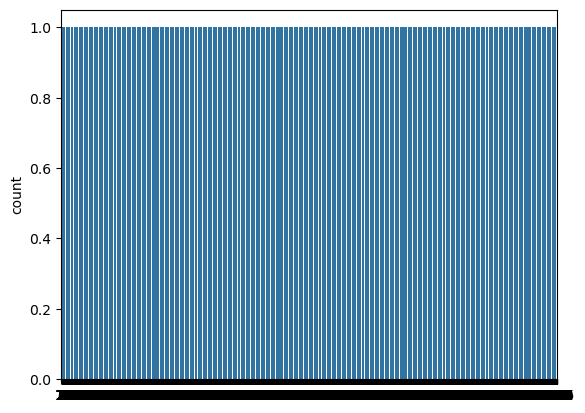

In [26]:
sns.countplot(water_data['Potability'])

# 

## 5. Data Preprocessing 

In [27]:
X = water_data.drop(['Potability'], axis=1)
y = water_data['Potability']

In [28]:
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [29]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

# 

## 6. Scalling

In [30]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [31]:
X_scaled = std_scaler.fit_transform(X)
X_scaled

array([[-1.02733269e-14,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

Mentransformasi data X dengan 'Zero Mean Value' dan satu standard deviasi. Tranformasi dimaksudkan untuk merubah dataset menjadi array.

# 

## 7. Classification Modelling 

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
X_train.shape, X_test.shape

((2620, 9), (656, 9))

### Model Development : 

List of Models :
1. LogisticRegressin
2. DecisionTreeClassifier
3. RandomForestClassifier
4. ExtraTreesClasifier
5. Support Vector Classifier
6. KNeighborsClassifier
7. GradientBoostingClassifier
8. Naive-Bayer
9. AdaBoostClassifier

#### Importing Models 

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [35]:
LR = LogisticRegression()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
ETC = ExtraTreesClassifier()
SVM = SVC()
KNN = KNeighborsClassifier()
GBC = GradientBoostingClassifier()
NB = GaussianNB()
ABC = AdaBoostClassifier()

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
models = [LR, DT, RF, ETC, SVM, KNN, GBC, NB, ABC]
features = X_scaled
labels = y
CV = 5
accu_list = [] # Accuracy List
ModelName = [] # Model Name List

for model in models :
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv = CV)
    accu_list.append(accuracies.mean()*100)
    ModelName.append(model_name)

model_acc_df = pd.DataFrame({"Model" : ModelName, "Cross_Val_Accuracy" : accu_list})
model_acc_df

,Model,Cross_Val_Accuracy
0,LogisticRegression,61.019549
1,DecisionTreeClassifier,57.570750
2,RandomForestClassifier,63.645085
3,ExtraTreesClassifier,63.309440
4,SVC,65.080339
5,KNeighborsClassifier,59.340579
6,GradientBoostingClassifier,61.753072
7,GaussianNB,61.263871
8,AdaBoostClassifier,59.249488


ini merupakan presentase akurasi setiap model. Dapat dilihat bahwa yang terbesar adalah SVM, ETC, dan RF. Maka, ketiga model ini akan dicek lebih lanjut.

In [38]:
from sklearn.metrics import classification_report

In [39]:
SVM.fit(X_train, y_train)
ETC.fit(X_train, y_train)
RF.fit(X_train, y_train)

y_pred_rf = RF.predict(X_test)
y_pred_svm = SVM.predict(X_test)
y_pred_etc = ETC.predict(X_test)

In [40]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.67      0.90      0.77       400
           1       0.67      0.32      0.43       256

    accuracy                           0.67       656
   macro avg       0.67      0.61      0.60       656
weighted avg       0.67      0.67      0.64       656



In [41]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.66      0.92      0.77       400
           1       0.69      0.27      0.39       256

    accuracy                           0.67       656
   macro avg       0.68      0.60      0.58       656
weighted avg       0.67      0.67      0.62       656



In [42]:
print(classification_report(y_test, y_pred_etc))

              precision    recall  f1-score   support

           0       0.66      0.90      0.76       400
           1       0.65      0.28      0.39       256

    accuracy                           0.66       656
   macro avg       0.66      0.59      0.58       656
weighted avg       0.66      0.66      0.62       656



karena RandomForestClassifier merupakan model yang paling lengkap dan mudah untuk dijelaskan, maka ada digunakan model RF.

# 

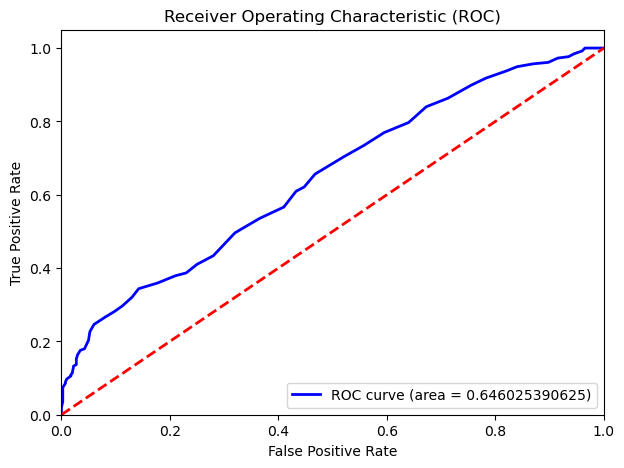

In [43]:
from sklearn.metrics import roc_curve, auc
y_scores = ETC.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

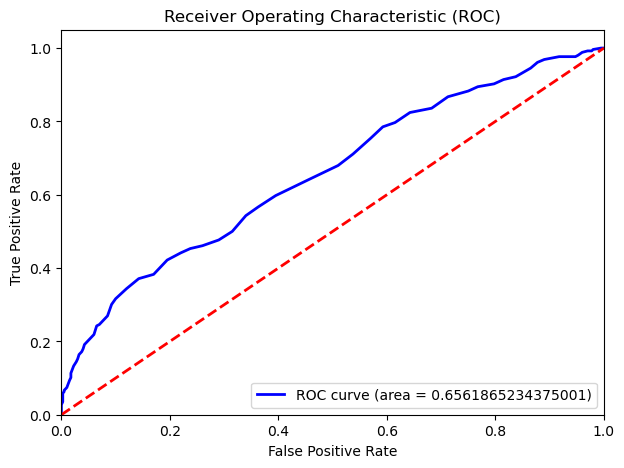

In [44]:
from sklearn.metrics import roc_curve, auc
y_scores = RF.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#### Best Model - Random Forest : 

In [45]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

params_RF = {"min_samples_split" : [2, 6],
            "min_samples_leaf" : [1, 4],
            "n_estimators" : [100, 200, 300],
            "criterion" : ["gini", 'entropy']
            }

cv_method = StratifiedKFold(n_splits=3)
GridSearchCV_RF = GridSearchCV(estimator  = ExtraTreesClassifier(),
                              param_grid = params_RF,
                              cv = cv_method,
                              verbose = 1,
                              n_jobs = 2,
                              scoring = "accuracy",
                              return_train_score = True
                              )

GridSearchCV_RF.fit(X_train, y_train)
best_params_RF = GridSearchCV_RF.best_params_
print("Best Hyperparameters for Random Forest are = ", best_params_RF)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Hyperparameters for Random Forest are =  {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [46]:
best_estimator = GridSearchCV_RF.best_estimator_
best_estimator.fit(X_train, y_train)
y_pred_best = best_estimator.predict(X_test)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.67      0.93      0.78       400
           1       0.72      0.27      0.40       256

    accuracy                           0.68       656
   macro avg       0.69      0.60      0.59       656
weighted avg       0.69      0.68      0.63       656



In [47]:
from sklearn.metrics import accuracy_score
print(f"Accuracy of Random Forest Model = {round(accuracy_score(y_test, y_pred_best)*100, 2)} %")

Accuracy of Random Forest Model = 67.53 %


In [48]:
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics

Y_pred = model.predict(y_pred_rf)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(y_pred_rf.classes, y_pred))
confusion_array = sklearn.metrics.confusion_matrix(y_pred_rf.classes, y_pred)

print('True Negative = ', confusion_array[0,0])
print('False Negative = ', confusion_array[1,0])
print('True Positive = ', confusion_array[1,1])
print('False Positive = ', confusion_array[0,1])

NotFittedError: This AdaBoostClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# 

## 8. Fuzzy Inference System Application 

In [ ]:
!pip install tensorflow

In [ ]:



import logging
logging.getLogger('tensorflow').disabled = True
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # remove WARNING Messages
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
# parameter class fis parameters


class fis_parameters():
    def __init__(self, n_input: int = 3, n_memb: int = 3, batch_size: int = 16, n_epochs: int = 25, memb_func: str = 'gaussian', optimizer: str = 'sgd', loss: str = 'mse'):
        self.n_input = n_input  # no. of Regressors
        self.n_memb = n_memb  # no. of fuzzy memberships
        self.batch_size = batch_size
        self.n_epochs = n_epochs
        self.memb_func = memb_func  # 'gaussian' / 'gbellmf'
        self.optimizer = optimizer   # sgd / adam /
        self.loss = loss  # mse / mae


# Main Class ANFIS
class ANFIS:
    def __init__(self, n_input: int, n_memb: int, batch_size: int = 16, memb_func: str = 'gaussian', name: str = 'MyAnfis'):
        self.n = n_input
        self.m = n_memb
        self.batch_size = batch_size
        self.memb_func = memb_func
        input_ = keras.layers.Input(
            shape=(n_input), name='inputLayer', batch_size=self.batch_size)
        L1 = FuzzyLayer(n_input, n_memb, memb_func, name='fuzzyLayer')(input_)
        L2 = RuleLayer(n_input, n_memb, name='ruleLayer')(L1)
        L3 = NormLayer(name='normLayer')(L2)
        L4 = DefuzzLayer(n_input, n_memb, name='defuzzLayer')(L3, input_)
        L5 = SummationLayer(name='sumLayer')(L4)
        self.model = keras.Model(inputs=[input_], outputs=[L5], name=name)
        self.update_weights()

    def __call__(self, X):
        return self.model.predict(X, batch_size=self.batch_size)

    def update_weights(self):
        # premise parameters (mu&sigma for gaussian // a/b/c for bell-shaped)
        if self.memb_func == 'gaussian':
            self.mus, self.sigmas = self.model.get_layer(
                'fuzzyLayer').get_weights()
        elif self.memb_func == 'gbellmf':
            self.a, self.b, self.c = self.model.get_layer(
                'fuzzyLayer').get_weights()
        # consequence parameters
        self.bias, self.weights = self.model.get_layer(
            'defuzzLayer').get_weights()

    def plotmfs(self, show_initial_weights=False):
        n_input = self.n
        n_memb = self.m

        if self.memb_func == 'gaussian':
            mus, sigmas = np.around(self.model.get_layer(
                'fuzzyLayer').get_weights(), 2)
            mus, sigmas = mus.reshape(
                (n_memb, n_input, 1)), sigmas.reshape(n_memb, n_input, 1)

            xn = np.linspace(np.min(mus) - 2 * np.max(abs(sigmas)),
                             np.max(mus) + 2 * np.max(abs(sigmas)), 100).reshape((1, 1, -1))
            xn = np.tile(xn, (n_memb, n_input, 1))

            # broadcast all curves in one array
            memb_curves = np.exp(-np.square((xn - mus)) / np.square(sigmas))

            if show_initial_weights:
                mus_init, sigmas_init = np.around(self.init_weights, 2)
                mus_init, sigmas_init = mus_init.reshape(
                    n_memb, n_input, 1), sigmas_init.reshape(n_memb, n_input, 1)
                init_curves = np.exp(-np.square((xn - mus_init)
                                                ) / np.square(sigmas_init))

        elif self.memb_func == 'gbellmf':
            a, b, c = np.around(self.model.get_layer(
                'fuzzyLayer').get_weights(), 2)
            a, b, c = a.reshape((n_memb, n_input, 1)), b.reshape(
                n_memb, n_input, 1), c.reshape(n_memb, n_input, 1)

            xn = np.linspace(np.min(c) - 2 * np.max(abs(a)),
                             np.max(c) + 2 * np.max(abs(a)), 100).reshape((1, 1, -1))
            xn = np.tile(xn, (n_memb, n_input, 1))

            # broadcast all curves in one array
            memb_curves = 1 / (1 + np.square((xn - c) / a)**b)

            if show_initial_weights:
                a_init, b_init, c_init = np.around(self.init_weights, 2)
                a_init, b_init, c_init = a_init.reshape((n_memb, n_input, 1)), b_init.reshape(
                    n_memb, n_input, 1), c_init.reshape(n_memb, n_input, 1)
                init_curves = 1 / \
                    (1 + np.square((xn - c_init) / a_init)**b_init)

        elif self.memb_func == 'sigmoid':
            gammas, c = np.around(self.model.get_layer(
                'fuzzyLayer').get_weights(), 2)
            gammas, c = gammas.reshape(
                (n_memb, n_input, 1)), c.reshape(n_memb, n_input, 1)

            xn = np.linspace(np.min(c) - 2 * np.max(abs(c)), np.max(c) + 2 * np.max(
                abs(c)), 100).reshape((1, 1, -1))  # TODO: change confidence bands
            xn = np.tile(xn, (n_memb, n_input, 1))

            # broadcast all curves in one array
            memb_curves = 1 / (1 + np.exp(-gammas * (xn - c)))

            if show_initial_weights:
                gammas_init, c_init = np.around(self.init_weights, 2)
                gammas_init, c_init = gammas_init.reshape(
                    n_memb, n_input, 1), c_init.reshape(n_memb, n_input, 1)
                init_curves = 1 / (1 + np.exp(-gammas_init * (xn - c_init)))

        fig, axs = plt.subplots(nrows=n_input, ncols=1, figsize=(8, self.n * 3))
        fig.suptitle('Membership functions', size=16)
        for n in range(self.n):
            axs[n].grid(True)
            axs[n].set_title(f'Input {n+1}')
            for m in range(self.m):
                axs[n].plot(xn[m, n, :], memb_curves[m, n, :])

        if show_initial_weights:  # plot initial membership curve
            for n in range(self.n):
                axs[n].set_prop_cycle(None)  # reset color cycle
                for m in range(self.m):
                    axs[n].plot(xn[m, n, :], init_curves[m, n, :],
                                '--', alpha=.5)
        plt.show()

    def fit(self, X, y, **kwargs):
        # save initial weights in the anfis class
        self.init_weights = self.model.get_layer('fuzzyLayer').get_weights()

        # fit model & update weights in the anfis class
        history = self.model.fit(X, y, **kwargs)
        self.update_weights()

        # clear the graphs
        tf.keras.backend.clear_session()

        return history

    def get_memberships(self, Xs):
        intermediate_layer_model = keras.Model(inputs=self.model.input,
                                               outputs=self.model.get_layer('normLayer').output)

        intermediate_L2_output = intermediate_layer_model.predict(Xs)

        return intermediate_L2_output


# Custom weight initializer
def equally_spaced_initializer(shape, minval=-1.5, maxval=1.5, dtype=tf.float32):
    """
    Custom weight initializer:
        euqlly spaced weights along an operating range of [minval, maxval].
    """
    linspace = tf.reshape(tf.linspace(minval, maxval, shape[0]),
                          (-1, 1))
    return tf.Variable(tf.tile(linspace, (1, shape[1])))


# Layer 1
class FuzzyLayer(keras.layers.Layer):
    def __init__(self, n_input, n_memb, memb_func='gaussian', **kwargs):
        super(FuzzyLayer, self).__init__(**kwargs)
        self.n = n_input
        self.m = n_memb
        self.memb_func = memb_func

    def build(self, batch_input_shape):
        self.batch_size = batch_input_shape[0]

        if self.memb_func == 'gbellmf':
            self.a = self.add_weight(name='a',
                                     shape=(self.m, self.n),
                                     initializer=keras.initializers.RandomUniform(
                                         minval=.7, maxval=1.3, seed=1),
                                     #initializer = 'ones',
                                     trainable=True)
            self.b = self.add_weight(name='b',
                                     shape=(self.m, self.n),
                                     initializer=keras.initializers.RandomUniform(
                                         minval=.7, maxval=1.3, seed=1),
                                     #initializer = 'ones',
                                     trainable=True)
            self.c = self.add_weight(name='c',
                                     shape=(self.m, self.n),
                                     initializer=equally_spaced_initializer,
                                     #initializer = keras.initializers.RandomUniform(minval=-1.5, maxval=1.5, seed=1),
                                     #initializer = 'zeros',
                                     trainable=True)

        elif self.memb_func == 'gaussian':
            self.mu = self.add_weight(name='mu',
                                      shape=(self.m, self.n),
                                      initializer=equally_spaced_initializer,
                                      #initializer = keras.initializers.RandomUniform(minval=-1.5, maxval=1.5, seed=1),
                                      #initializer = 'zeros',
                                      trainable=True)
            self.sigma = self.add_weight(name='sigma',
                                         shape=(self.m, self.n),
                                         initializer=keras.initializers.RandomUniform(
                                             minval=.7, maxval=1.3, seed=1),
                                         #initializer = 'ones',
                                         trainable=True)

        elif self.memb_func == 'sigmoid':
            self.gamma = self.add_weight(name='gamma',
                                         shape=(self.m, self.n),
                                         initializer=equally_spaced_initializer,  # 'ones',
                                         trainable=True)

            self.c = self.add_weight(name='c',
                                     shape=(self.m, self.n),
                                     initializer=equally_spaced_initializer,  # 'ones',
                                     trainable=True)

        # Be sure to call this at the end
        super(FuzzyLayer, self).build(batch_input_shape)

    def call(self, x_inputs):
        if self.memb_func == 'gbellmf':
            L1_output = 1 / (1 +
                             tf.math.pow(
                                 tf.square(tf.subtract(
                                     tf.reshape(
                                         tf.tile(x_inputs, (1, self.m)), (-1, self.m, self.n)), self.c
                                 ) / self.a), self.b)
                             )
        elif self.memb_func == 'gaussian':
            L1_output = tf.exp(-1 *
                               tf.square(tf.subtract(
                                   tf.reshape(
                                       tf.tile(x_inputs, (1, self.m)), (-1, self.m, self.n)), self.mu
                               )) / tf.square(self.sigma))

        elif self.memb_func == 'sigmoid':
            L1_output = tf.math.divide(1,
                                       tf.math.exp(-self.gamma *
                                                   tf.subtract(
                                                       tf.reshape(
                                                           tf.tile(x_inputs, (1, self.m)), (-1, self.m, self.n)), self.c)
                                                   )
                                       )
        return L1_output


# Layer 2
class RuleLayer(keras.layers.Layer):
    def __init__(self, n_input, n_memb, **kwargs):
        super(RuleLayer, self).__init__(**kwargs)
        self.n = n_input
        self.m = n_memb
        self.batch_size = None

    def build(self, batch_input_shape):
        self.batch_size = batch_input_shape[0]
        # self.batch_size = tf.shape(batch_input_shape)[0]
        # Be sure to call this at the end
        super(RuleLayer, self).build(batch_input_shape)

    def call(self, input_):
        if self.n == 2:
            L2_output = tf.reshape(input_[:, :, 0], [self.batch_size, -1, 1]) * \
                tf.reshape(input_[:, :, 1], [self.batch_size, 1, -1])
        elif self.n == 3:
            L2_output = tf.reshape(input_[:, :, 0], [self.batch_size, -1, 1, 1]) * \
                tf.reshape(input_[:, :, 1], [self.batch_size, 1, -1, 1]) * \
                tf.reshape(input_[:, :, 2], [self.batch_size, 1, 1, -1])
        elif self.n == 4:
            L2_output = tf.reshape(input_[:, :, 0], [self.batch_size, -1, 1, 1, 1]) * \
                tf.reshape(input_[:, :, 1], [self.batch_size, 1, -1, 1, 1]) * \
                tf.reshape(input_[:, :, 2], [self.batch_size, 1, 1, -1, 1]) * \
                tf.reshape(input_[:, :, 3], [self.batch_size, 1, 1, 1, -1])
        elif self.n == 5:
            L2_output = tf.reshape(input_[:, :, 0], [self.batch_size, -1, 1, 1, 1, 1]) * \
                tf.reshape(input_[:, :, 1], [self.batch_size, 1, -1, 1, 1, 1]) * \
                tf.reshape(input_[:, :, 2], [self.batch_size, 1, 1, -1, 1, 1]) * \
                tf.reshape(input_[:, :, 3], [self.batch_size, 1, 1, 1, -1, 1]) * \
                tf.reshape(input_[:, :, 4], [self.batch_size, 1, 1, 1, 1, -1])
        elif self.n == 6:
            L2_output = tf.reshape(input_[:, :, 0], [self.batch_size, -1, 1, 1, 1, 1, 1]) * \
                tf.reshape(input_[:, :, 1], [self.batch_size, 1, -1, 1, 1, 1, 1]) * \
                tf.reshape(input_[:, :, 2], [self.batch_size, 1, 1, -1, 1, 1, 1]) * \
                tf.reshape(input_[:, :, 3], [self.batch_size, 1, 1, 1, -1, 1, 1]) * \
                tf.reshape(input_[:, :, 4], [self.batch_size, 1, 1, 1, 1, -1, 1]) * \
                tf.reshape(input_[:, :, 5], [
                           self.batch_size, 1, 1, 1, 1, 1, -1])
        else:
            raise ValueError(
                f'This ANFIS implementation works with 2 to 6 inputs.')

        return tf.reshape(L2_output, [self.batch_size, -1])


# Layer 3
class NormLayer(keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, w):
        w_sum = tf.reshape(tf.reduce_sum(w, axis=1), (-1, 1))
        w_norm = w / w_sum
        return w_norm


# Layer 4
class DefuzzLayer(keras.layers.Layer):
    def __init__(self, n_input, n_memb, **kwargs):
        super().__init__(**kwargs)
        self.n = n_input
        self.m = n_memb

        self.CP_bias = self.add_weight(name='Consequence_bias',
                                       shape=(1, self.m ** self.n),
                                       initializer=keras.initializers.RandomUniform(
                                           minval=-2, maxval=2),
                                       # initializer = 'ones',
                                       trainable=True)
        self.CP_weight = self.add_weight(name='Consequence_weight',
                                         shape=(self.n, self.m ** self.n),
                                         initializer=keras.initializers.RandomUniform(
                                             minval=-2, maxval=2),
                                         # initializer = 'ones',
                                         trainable=True)

    def call(self, w_norm, input_):

        L4_L2_output = tf.multiply(w_norm,
                                   tf.matmul(input_, self.CP_weight) + self.CP_bias)
        return L4_L2_output  # Defuzzyfied Layer


# Layer 5
class SummationLayer(keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def build(self, batch_input_shape):
        self.batch_size = batch_input_shape[0]
        #self.batch_size = tf.shape(batch_input_shape)[0]
        # Be sure to call this at the end
        super(SummationLayer, self).build(batch_input_shape)

    def call(self, input_):
        L5_L2_output = tf.reduce_sum(input_, axis=1)
        L5_L2_output = tf.reshape(L5_L2_output, (-1, 1))
        return L5_L2_output

    # def compute_L2_output_shape(self, batch_input_shape):
        # return tf.TensorShape([self.batch_size, 1])


#########################################################################################

# 

## 9. Classification System

In [ ]:
water_data.columns

In [ ]:
list1 = water_data.iloc[2:3, 0:9].values.flatten().tolist()
list1

In [ ]:
ph = float(input('Enter the pH Value = '))
Hardness = float(input('Enter the Hardness Value = '))
Solids = float(input('Enter the Solids Value = '))
Chloramines = float(input('Enter the Chloramines Value  = '))
Sulfate = float(input('Enter the Sulfate Value = '))
Conductivity = float(input('Enter the Conductivity Value = '))
Organic_carbon = float(input('Enter the Organic_Carbon Value = '))
Trihalomethanes = float(input('Enter the Trihalomethanes Value = '))
Turbidity = float(input('Enter the Turbidity Value = '))

In [ ]:
input_data = [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity,
             Organic_carbon, Trihalomethanes, Turbidity]

In [ ]:
water_data_input = std_scaler.transform([[ph, Hardness, Solids, Chloramines, Sulfate, Conductivity,
                                         Organic_carbon, Trihalomethanes, Turbidity]])
water_data_input

In [ ]:
model_prediction = best_estimator.predict(water_data_input)
model_prediction

In [ ]:
if model_prediction[0] == 0:
    print("Water is Not SAFE for Plant")
else :
    print("Water is SAFE for Plant")

In [ ]:
def water_Quality_Prediction(input_data) :
    scaled_data = std_scaler.transform(scaled_data)
    model_prediction = best_estimator.predict(scaled_data)
    if model_prediction[0] == 0 :
        return "Water is NOT SAFE for Consumption"
    else : 
        return "Water is SAFE for Consumption"

In [ ]:
ph = float(input('Enter the pH Value = '))
Hardness = float(input('Enter the Hardness Value = '))
Solids = float(input('Enter the Solids Value = '))
Chloramines = float(input('Enter the Chloramines Value  = '))
Sulfate = float(input('Enter the Sulfate Value = '))
Conductivity = float(input('Enter the Conductivity Value = '))
Organic_carbon = float(input('Enter the Organic_Carbon Value = '))
Trihalomethanes = float(input('Enter the Trihalomethanes Value = '))
Turbidity = float(input('Enter the Turbidity Value = '))

input_data = [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity,
             Organic_carbon, Trihalomethanes, Turbidity]
water_Quality_Prediction(input_data)

# 

#### Save Trained Model: 

In [ ]:
import pickle

In [ ]:
filename = 'Water_Quality_ML_Trained_Model.sav'
pickle.dump(best_estimator, open(filename, 'wb'))

# 

#### Load Trained Model: 

In [ ]:
water_quality_model = pickle.load(open('Water_Quality_ML_Trained_Model.sav', 'rb'))


In [ ]:
data = [7.56, 237, 14245, 6.289, 373, 10.47, 85.9, 2.44]
scaled_data1 = std_scaler.transform([data])
water_quality_model.predict(scaled.data1)